In [23]:
import pandas as pd

# Load dataset

data = pd.read_csv("Salary_Data.csv")

# Lihat informasi dasar dan ringkasan data
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.00

In [24]:
print(data.isnull().sum())

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [25]:
# Mengidentifikasi kolom numerik dan kategorikal
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Mengisi nilai kosong pada kolom numerik dengan mean
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

# Mengisi nilai kosong pada kolom kategorikal dengan modus
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Mengisi nilai kosong pada kolom target (Salary) dengan rata-rata
data['Salary'] = data['Salary'].fillna(data['Salary'].mean())

# Memeriksa nilai kosong setelah pengisian
print(data.isnull().sum())


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


C:\Users\Yessy Arye Yustraini\AppData\Local\Temp\ipykernel_8128\3029504502.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\Yessy Arye Yustraini\AppData\Local\Temp\ipykernel_8128\3029504502.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Pisahkan fitur dan target 
X = data.drop(columns=['Salary']) 
y = data['Salary']

# Identifikasi tipe kolom
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(data.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


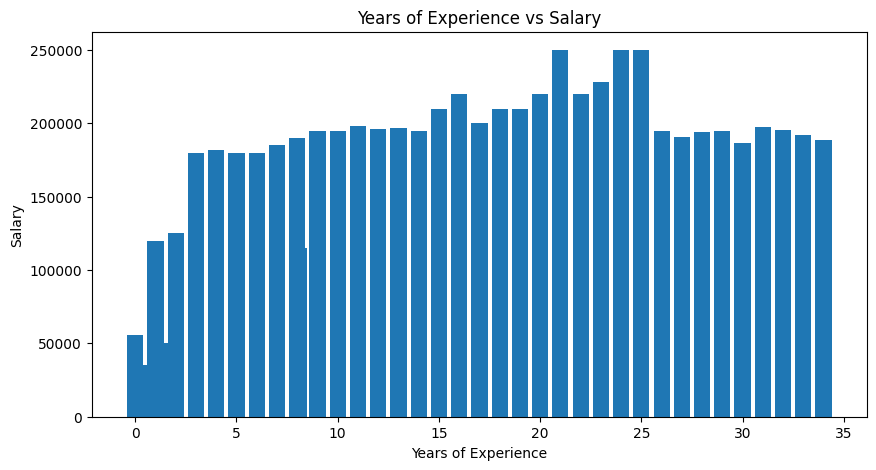

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(data['Years of Experience'], data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()

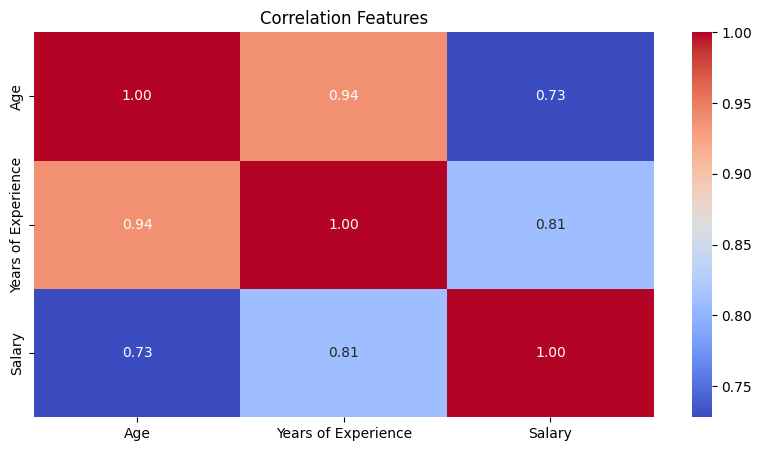

In [28]:
import seaborn as sns

# Exclude categorical columns for correlation calculation
corr_matrix = data.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Features')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tres' : DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

# Pipeline untuk setiap model
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'R2': r2}
    print(f"{name} - MAE: {mae:.2f}, R2: {r2:.3f}")

Linear Regression - MAE: 12574.22, R2: 0.879
Decision Tres - MAE: 2668.56, R2: 0.975
K-Nearest Neighbors - MAE: 3886.22, R2: 0.969
Random Forest - MAE: 2756.34, R2: 0.981
Support Vector Machine - MAE: 44445.16, R2: 0.012


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Gunakan Random Forest
model = RandomForestRegressor(random_state=42)

# Pipeline untuk Random Forest
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X_train, y_train)

# Evaluasi pada data train
y_train_pred = pipeline.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluasi pada data test
y_test_pred = pipeline.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Output hasil
print(f"Random Forest - Train: MAE: {mae_train:.2f}, R2: {r2_train:.3f}")
print(f"Random Forest - Test: MAE: {mae_test:.2f}, R2: {r2_test:.3f}")

# Bandingkan performa dan mae model
if mae_train < mae_test:
    print("Model tidak overfitting(MAE).")
else:
    print("Model overfitting(MAE).")

if abs(r2_train - r2_test) > 0.1: 
    print("Model overfitting(R2).")
else:
    print("Model tidak overfitting(R2).")


Random Forest - Train: MAE: 1508.62, R2: 0.995
Random Forest - Test: MAE: 2756.34, R2: 0.981
Model tidak overfitting(MAE).
Model tidak overfitting(R2).


Tidak mengalami overfitting dan persentase dari MAE juga kecil sebesar 2.39%

In [31]:
import joblib

# Pilih model terbaik berdasarkan R²
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', models[best_model_name])])
best_model_pipeline.fit(X_train, y_train)

# Simpan model
joblib.dump(best_model_pipeline, 'best_salary_model.pkl')
print(f"Model terbaik adalah {best_model_name}, disimpan sebagai 'best_salary_model.pkl'")

Model terbaik adalah Random Forest, disimpan sebagai 'best_salary_model.pkl'


In [32]:
# Load model untuk prediksi
import joblib
import pandas as pd

# Load model yang telah disimpan
loaded_model = joblib.load('best_salary_model.pkl')

# Data baru untuk prediksi
new_data = pd.DataFrame({
    'Age': [65],  # contoh umur
    'Gender': ['Female'],  # jenis kelamin
    'Education Level': ["Bachelor's"],  # tingkat pendidikan
    'Job Title': ['Software Engineer'],  # judul pekerjaan
    'Years of Experience': [8]  # pengalaman kerja
})

# Prediksi
prediction = loaded_model.predict(new_data)
print(f"Predicted Salary: ${prediction[0]:.0f}")


Predicted Salary: $119165
